In [337]:
import pandas as pd
df = pd.read_csv('/Users/kaiyang/Desktop/employeedata.csv')
df.rename(columns={'id': 'ID', 'gender': "Gender",
                    'bdate': 'Bdate', 'educ': 'Educ', 
                    'jobcat': 'Jobcat','salary':'Salary','salbegin':'Salbegin','jobtime':'Jobtime','prevexp':'Prevexp','minority':'Minority'}, inplace=True)
df['Gender'] = np.where(df['Gender'] == "m", 1, 0) # df['Gender'] = df['Gender'].astype(int)
df = df.drop(columns=['Bdate'])
df_test = df
df.head()

,ID,Gender,Educ,Jobcat,Salary,Salbegin,Jobtime,Prevexp,Minority
0,1,1,15,3,57000,27000,98,144,0
1,2,1,16,1,40200,18750,98,36,0
2,3,0,12,1,21450,12000,98,381,0
3,4,0,8,1,21900,13200,98,190,0
4,5,1,15,1,45000,21000,98,138,0


In [339]:
Y = df['Salary']
X = df[['Gender',
 'Educ',
 'Jobcat',
 'Salbegin',
 'Jobtime',
 'Prevexp',
 'Minority']]
X = sm.add_constant(X)

In [341]:
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     358.9
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          3.29e-183
Time:                        22:03:00   Log-Likelihood:                -4851.8
No. Observations:                 474   AIC:                             9720.
Df Residuals:                     466   BIC:                             9753.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.361e+04   3007.164     -4.526      0.000   -1.95e+04   -7701.643
Gender      2139.9262    735.594      2.909      0.004     694.435    3585.417
Educ         470.0517    153.567      3.061      0.002     168.283     771.820
Jobcat      5760.3418    621.451      9.269      0.000    4539.148    6981.536
Salbegin       1.3196      0.070     18.821      0.000       1.182       1.457
Jobtime      149.9827     31.327      4.788      0.000      88.423     211.543
Prevexp      -20.9498      3.321     -6.308      0.000     -27.476     -14.424
Minority    -987.3965    784.185     -1.259      0.209   -2528.372     553.579
==============================================================================
Omnibus:                      210.315   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1926.669
Skew:                           1.680   Prob(JB):                         0.00
Kurtosis:                      12.288   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

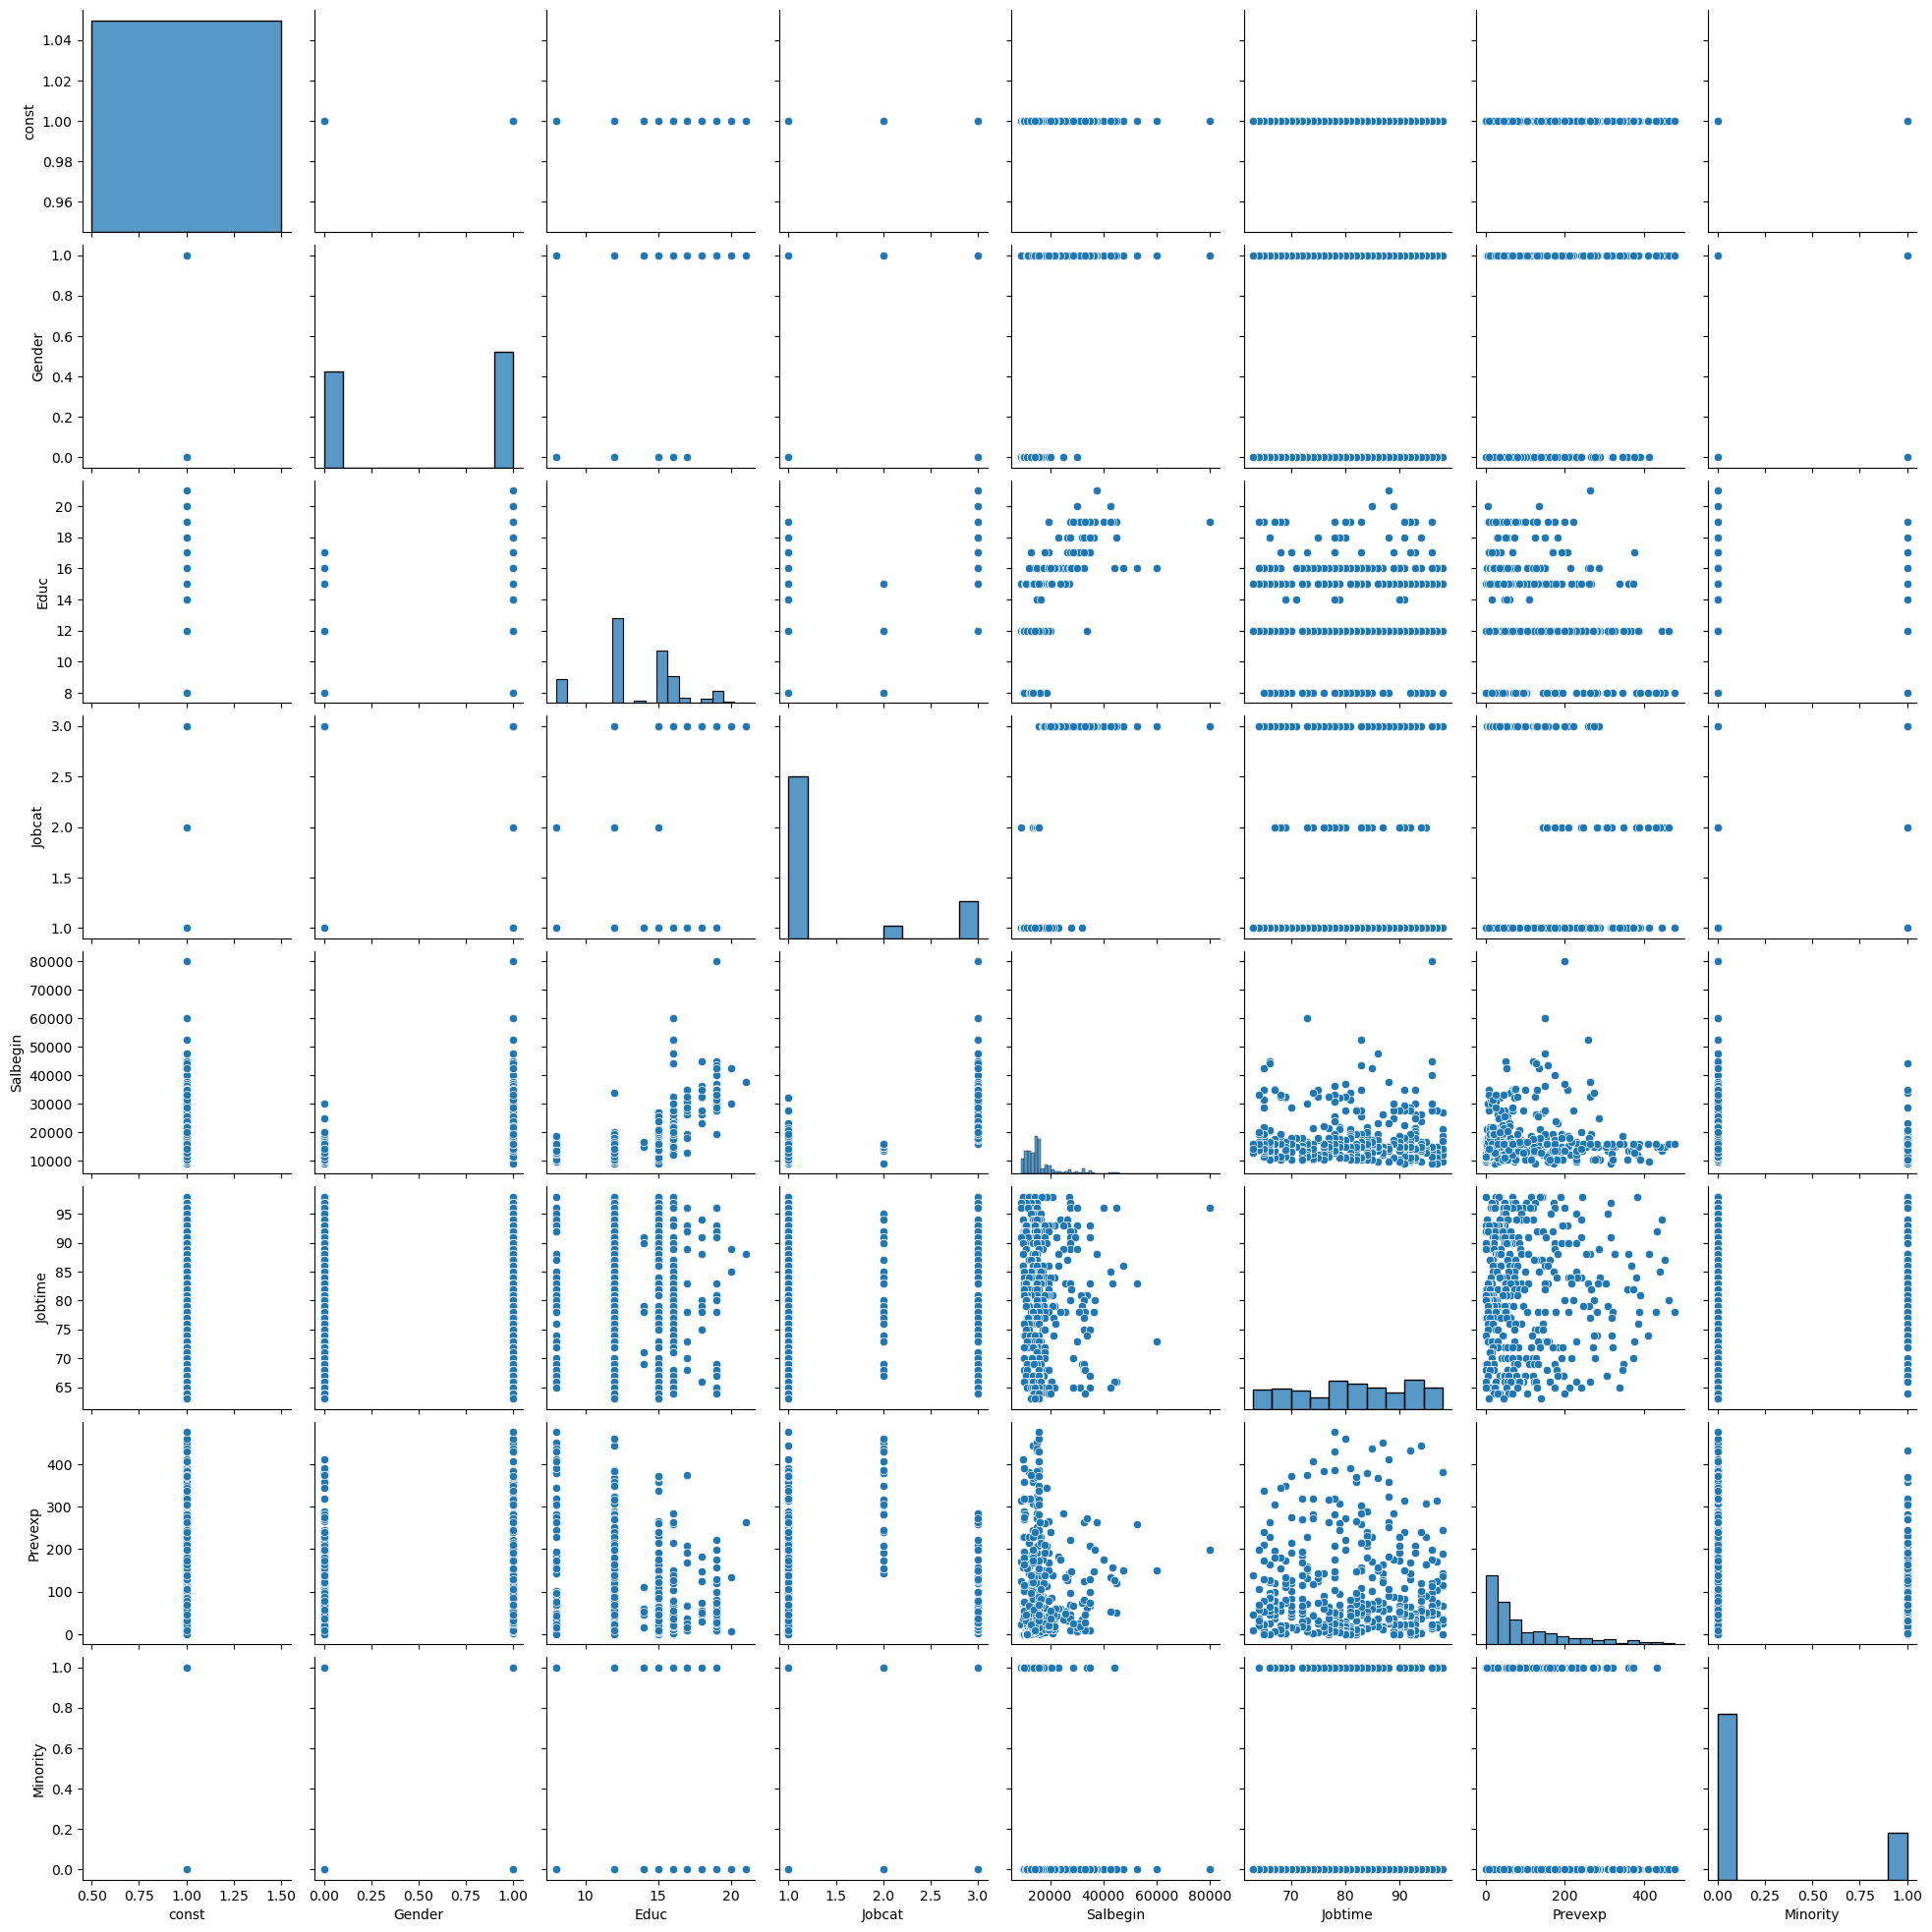

In [343]:
import seaborn as sns
sns.pairplot(X);

In [344]:
round(df.corr(),2)

,ID,Gender,Educ,Jobcat,Salary,Salbegin,Jobtime,Prevexp,Minority
ID,1.00,-0.08,-0.06,-0.01,-0.10,0.01,-1.00,-0.00,-0.03
Gender,-0.08,1.00,0.36,0.38,0.45,0.46,0.07,0.16,0.08
Educ,-0.06,0.36,1.00,0.51,0.66,0.63,0.05,-0.25,-0.13
Jobcat,-0.01,0.38,0.51,1.00,0.78,0.75,0.01,0.06,-0.14
Salary,-0.10,0.45,0.66,0.78,1.00,0.88,0.08,-0.10,-0.18
Salbegin,0.01,0.46,0.63,0.75,0.88,1.00,-0.02,0.05,-0.16
Jobtime,-1.00,0.07,0.05,0.01,0.08,-0.02,1.00,0.00,0.05
Prevexp,-0.00,0.16,-0.25,0.06,-0.10,0.05,0.00,1.00,0.14
Minority,-0.03,0.08,-0.13,-0.14,-0.18,-0.16,0.05,0.14,1.00


In [345]:
X1 = df.drop(columns='ID', inplace=False)
mod1 = sm.OLS(Y, X1)
mod1_res = mod1.fit()
mod1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.498e+32
Date:                Wed, 05 Feb 2025   Prob (F-statistic):                        0.00
Time:                        22:03:03   Log-Likelihood:                          11120.
No. Observations:                 474   AIC:                                 -2.222e+04
Df Residuals:                     466   BIC:                                 -2.219e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender      -2.25e-11   1.71e-12    -13.146      0.000   -2.59e-11   -1.91e-11
Educ        1.741e-13   3.17e-13      0.549      0.583   -4.49e-13    7.97e-13
Jobcat     -3.392e-12   1.57e-12     -2.161      0.031   -6.48e-12   -3.08e-13
Salary         1.0000   1.05e-16   9.49e+15      0.000       1.000       1.000
Salbegin    6.061e-16   2.15e-16      2.822      0.005    1.84e-16    1.03e-15
Jobtime     -1.43e-13   4.29e-14     -3.332      0.001   -2.27e-13   -5.87e-14
Prevexp     3.165e-14    7.9e-15      4.005      0.000    1.61e-14    4.72e-14
Minority   -3.295e-13   1.82e-12     -0.181      0.857   -3.91e-12    3.25e-12
==============================================================================
Omnibus:                      198.445   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1903.182
Skew:                          -1.544   Prob(JB):                         0.00
Kurtosis:                      12.318   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [346]:
X2 = df.drop(columns=['ID','Minority'], inplace=False)
mod2 = sm.OLS(Y, X2)
mod2_res = mod2.fit()
mod2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.880e+32
Date:                Wed, 05 Feb 2025   Prob (F-statistic):                        0.00
Time:                        22:03:03   Log-Likelihood:                          11167.
No. Observations:                 474   AIC:                                 -2.232e+04
Df Residuals:                     467   BIC:                                 -2.229e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender      6.245e-12   1.53e-12      4.076      0.000    3.23e-12    9.26e-12
Educ        -7.74e-13   2.87e-13     -2.698      0.007   -1.34e-12    -2.1e-13
Jobcat     -5.143e-13   1.42e-12     -0.362      0.717    -3.3e-12    2.28e-12
Salary         1.0000   9.51e-17   1.05e+16      0.000       1.000       1.000
Salbegin    1.041e-15   1.94e-16      5.358      0.000    6.59e-16    1.42e-15
Jobtime    -1.223e-13   3.84e-14     -3.184      0.002   -1.98e-13   -4.68e-14
Prevexp     8.423e-15   7.11e-15      1.184      0.237   -5.55e-15    2.24e-14
==============================================================================
Omnibus:                      309.515   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5253.455
Skew:                          -2.537   Prob(JB):                         0.00
Kurtosis:                      18.500   Cond. No.                     9.95e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [347]:
import statsmodels.formula.api as smf
mod3f = smf.ols('Salary ~ Gender + Educ + Jobcat + Salbegin + Jobtime + Prevexp', data=df)
mod3f_res = mod3f.fit()
mod3f_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     417.9
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          3.40e-184
Time:                        22:03:03   Log-Likelihood:                -4852.6
No. Observations:                 474   AIC:                             9719.
Df Residuals:                     467   BIC:                             9748.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.382e+04   3004.361     -4.601      0.000   -1.97e+04   -7918.442
Gender      2005.0468    728.208      2.753      0.006     574.076    3436.017
Educ         471.8788    153.656      3.071      0.002     169.936     773.821
Jobcat      5802.3314    620.945      9.344      0.000    4582.139    7022.523
Salbegin       1.3284      0.070     19.030      0.000       1.191       1.466
Jobtime      148.5239     31.325      4.741      0.000      86.968     210.080
Prevexp      -21.4462      3.300     -6.500      0.000     -27.930     -14.962
==============================================================================
Omnibus:                      211.780   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1941.027
Skew:                           1.695   Prob(JB):                         0.00
Kurtosis:                      12.316   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/rr/q2hphpp53sg6tswwk64tz_tw0000gn/T/ipykernel_34992/3312276013.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mod3f_res.resid, fit=stats.norm);


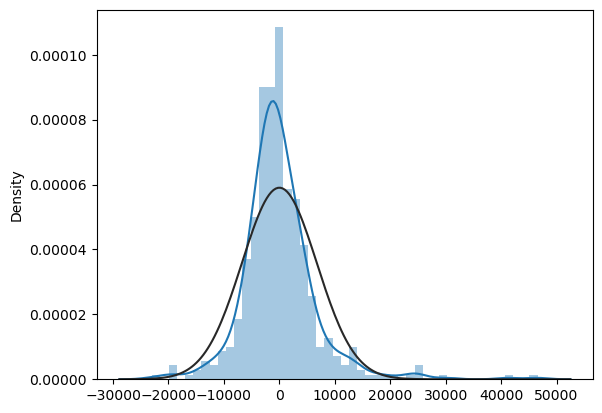

In [348]:
from scipy import stats
sns.distplot(mod3f_res.resid, fit=stats.norm);

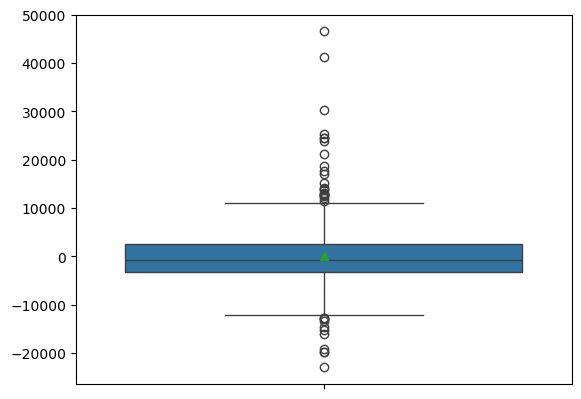

In [349]:
sns.boxplot(mod3f_res.resid, showmeans=True);

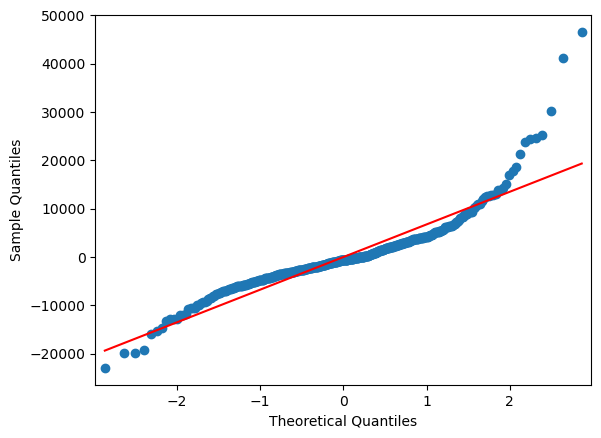

In [356]:
sm.qqplot(mod3f_res.resid, line='s');

In [359]:
df_test.head()

,ID,Gender,Educ,Jobcat,Salary,Salbegin,Jobtime,Prevexp,Minority
0,1,1,15,3,57000,27000,98,144,0
1,2,1,16,1,40200,18750,98,36,0
2,3,0,12,1,21450,12000,98,381,0
3,4,0,8,1,21900,13200,98,190,0
4,5,1,15,1,45000,21000,98,138,0


In [369]:
from scipy import stats

Y = df_test['Salary']
X = df_test[['Gender',
        'Educ',
        'Jobcat',
        'Salbegin',
        'Jobtime',
        'Prevexp',
        'Minority']]
X = sm.add_constant(X)

Y_norm = pd.Series(stats.zscore(Y))
Y_norm.head()

0    1.323772
1    0.338876
2   -0.760338
3   -0.733957
4    0.620275
Name: Salary, dtype: float64

In [375]:
X_norm = X.loc[:, X.columns != "const"]
X_norm = pd.DataFrame(stats.zscore(X_norm))
X_norm = sm.add_constant(X_norm)
X_norm.columns = X.columns
check = pd.concat([round(X_norm.mean(axis=0), 5), round(X_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

,mean,std dev
const,1.0,0.0
Gender,0.0,1.0
Educ,-0.0,1.0
Jobcat,0.0,1.0
Salbegin,0.0,1.0
Jobtime,0.0,1.0
Prevexp,0.0,1.0
Minority,-0.0,1.0


In [377]:
modstd = sm.OLS(Y_norm, X_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     358.9
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          3.29e-183
Time:                        22:08:02   Log-Likelihood:                -232.95
No. Observations:                 474   AIC:                             481.9
Df Residuals:                     466   BIC:                             515.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.607e-16      0.018   8.77e-15      1.000      -0.036       0.036
Gender         0.0625      0.021      2.909      0.004       0.020       0.105
Educ           0.0794      0.026      3.061      0.002       0.028       0.130
Jobcat         0.2608      0.028      9.269      0.000       0.206       0.316
Salbegin       0.6082      0.032     18.821      0.000       0.545       0.672
Jobtime        0.0884      0.018      4.788      0.000       0.052       0.125
Prevexp       -0.1283      0.020     -6.308      0.000      -0.168      -0.088
Minority      -0.0240      0.019     -1.259      0.209      -0.061       0.013
==============================================================================
Omnibus:                      210.315   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1926.669
Skew:                           1.680   Prob(JB):                         0.00
Kurtosis:                      12.288   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Tornado diagram

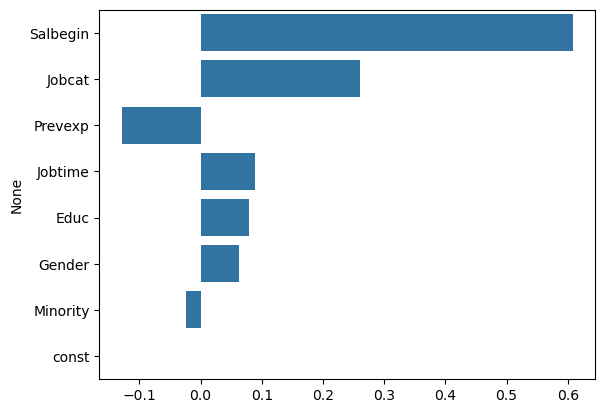

In [379]:
coeff = modstd_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

In [382]:
pip install mlxtend 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [384]:
Y1 = df_test['Salary']
X1 = df_test[['Gender',
        'Educ',
        'Jobcat',
        'Salbegin',
        'Jobtime',
        'Prevexp',
        'Minority']]

In [390]:
X1.head()

,Gender,Educ,Jobcat,Salbegin,Jobtime,Prevexp,Minority
0,1,15,3,27000,98,144,0
1,1,16,1,18750,98,36,0
2,0,12,1,12000,98,381,0
3,0,8,1,13200,98,190,0
4,1,15,1,21000,98,138,0


In [392]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [394]:
mod = LinearRegression()
mod.fit(X1,Y1)

LinearRegression()

In [396]:
coef = pd.concat([pd.Series(X1.columns), pd.Series(mod.coef_)], axis=1)
coef.columns=["variable", "coefficient"]
coef

,variable,coefficient
0,Gender,2139.926202
1,Educ,470.051696
2,Jobcat,5760.341819
3,Salbegin,1.319560
4,Jobtime,149.982672
5,Prevexp,-20.949838
6,Minority,-987.396450


In [398]:
sfs = SFS(mod,
         k_features='best',
         forward=False,
         floating=False,
         scoring='r2',
         cv=30)

sfs = sfs.fit(X1,Y1)

In [400]:
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.95)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.8838781883770237, 0.8417214997954143, 0.892...",0.784566,"(Gender, Educ, Jobcat, Salbegin, Jobtime, Prev...",0.059936,0.158042,0.029348
6,"(0, 1, 2, 3, 4, 5)","[0.8834156315401887, 0.8403695565368184, 0.890...",0.785549,"(Gender, Educ, Jobcat, Salbegin, Jobtime, Prev...",0.059737,0.157518,0.02925
5,"(0, 2, 3, 4, 5)","[0.8759504145582601, 0.8483045835543798, 0.892...",0.783925,"(Gender, Jobcat, Salbegin, Jobtime, Prevexp)",0.059442,0.156741,0.029106
4,"(2, 3, 4, 5)","[0.8657047447272774, 0.8486191985208884, 0.894...",0.780342,"(Jobcat, Salbegin, Jobtime, Prevexp)",0.061825,0.163023,0.030273
3,"(2, 3, 5)","[0.7991400613953372, 0.8210485581208291, 0.860...",0.770244,"(Jobcat, Salbegin, Prevexp)",0.062612,0.165098,0.030658
2,"(3, 5)","[0.8772600585817328, 0.7990105622849962, 0.837...",0.741187,"(Salbegin, Prevexp)",0.066924,0.176467,0.032769
1,"(3,)","[0.8321675091294589, 0.7878861201990476, 0.837...",0.714151,"(Salbegin,)",0.071329,0.188083,0.034926


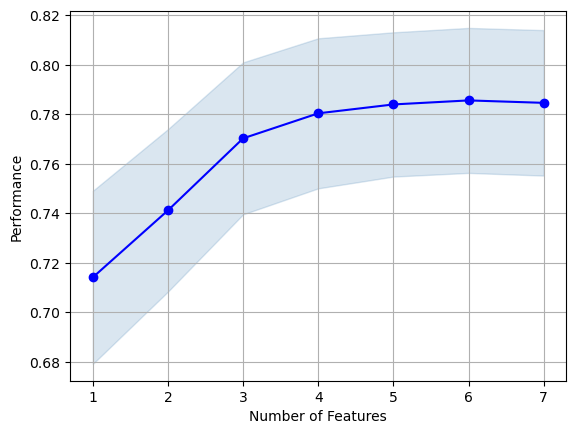

In [402]:
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.grid()
plt.show()

In [404]:
sfs.subsets_[6].get('feature_names')

('Gender', 'Educ', 'Jobcat', 'Salbegin', 'Jobtime', 'Prevexp')